# Labolatorium 3: Sieci złożone

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from numpy.random import default_rng

random = default_rng()

## Zadanie 1 Model rosnącego grafu scale-free: Barab ́asi-Albert (BA)
1. Napisz program modelujący wzrost sieci złożonej według modelu BA:
    - Wejściem programu jest liczba wierzchołków grafu *n* oraz stopień nowo dodanego wierzchołka *m*
    - Wzrost grafu rozpoczyna się od *m0* izolowanych wierzchołków
    - W kolejnych *n−m0* krokach dodawany jest nowy wierzchołek grafu *j* o stopniu *m*, przy czym *m<=m0*
    - Nowe krawędzie wierzchołka *j* tworzone są według reguły __preferential attachment__, tzn. prawdopodobieństwo utworzenia krawędzi pomiędzy wierzchołkiem *j* a wierzchołkiem *i* jest proporcjonalne do stopnia wierzchołka *i*.

In [71]:
def generate_graph(n: int, m: int):
    """Generate new graph.

    n - number of nodes
    m - degree of new nodes
    """
    graph = nx.Graph()
    m0 = random.integers(low=m, high=m+10)
    graph.add_nodes_from(list(range(0, m0)))
    for i in range(n-m0):
        degrees = np.array(list(map(lambda d: d[1] + 1, graph.degree)))
        degrees = degrees / degrees.sum()
        edges = [(m0+i, x)
                 for x in random.choice(graph.nodes, m, p=degrees, replace=False)]
        graph.add_node(m0+i)
        graph.add_edges_from(edges)

    return graph


2. Wygeneruj kilka grafów BA, przykładowo dla *(m,n)* ∈ {(3,10^2),(3,10^3),(2,10^5),(3,10^5)}

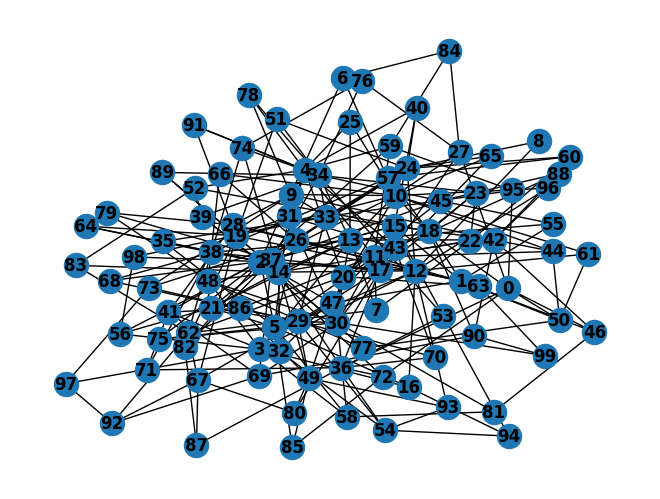

In [70]:
g_3_10_2 = generate_graph(n=100,m=3)
nx.draw(g_3_10_2, with_labels=True, font_weight='bold')

In [121]:
g_3_10_3 = generate_graph(n=1000,m=3)

In [98]:
g_2_10_4 = generate_graph(n=10**4,m=2)

In [99]:
g_3_10_4 = generate_graph(n=10**4,m=3)

3. Narysuj rozkład stopni wierzchołków każdego wygenerowanego grafu w skali log-log. Korzystając, z regresji liniowej, wyznacz wartość wykładnika *γ*. Podaj uzyskane wartości w sprawozdaniu.

In [16]:
def degree_dist(graph):
    degrees = list(map(lambda d: d[1], graph.degree))

    counter = Counter(degrees)
    
    x = np.array(list(counter.keys()))
    y = np.array(list(counter.values()))
    print(x)
    print(y)

    m, b = np.polyfit(np.log(x), np.log(y), 1)

    plt.plot(x, y, 'o')
    plt.plot(x, np.e**(m*np.log(x) + b))
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    print(f'γ = {m}')

[ 7 20 11  9  3  4  2 14 12  8 10  6  5 13]
[ 6  1  3  5 36 20  1  2  2  5  3  6  9  1]


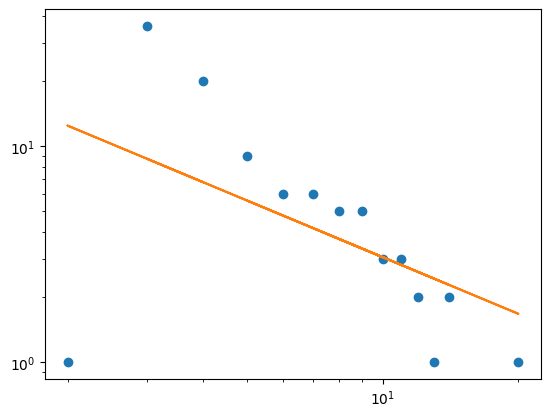

γ = -0.8720120028487754


In [75]:
degree_dist(g_3_10_2)

[26 22 35 23  1 10 58 36 52 53 60 27 29 75 24 14 19 46 20  7 17  6 11 13
 18  8 16 12  5  3  9  4 15]
[  3   5   1   5   2  31   1   2   1   1   1   1   1   1   2  10   6   1
   3  51   4  69  21   9   2  46   2  11 125 367  22 192   1]


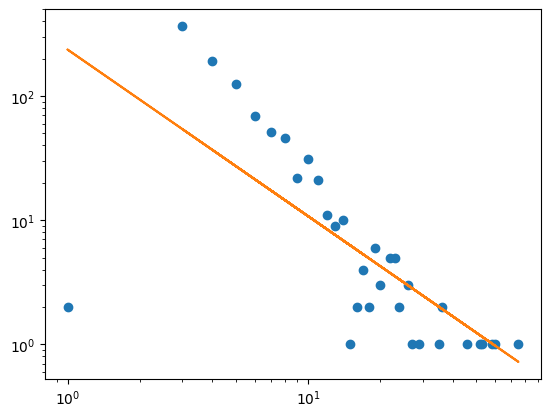

γ = -1.3413987917907615


In [76]:
degree_dist(g_3_10_3)

[ 45  11  60 104  15  86   6  16  51   2  47  85  41  13  52  34  39  55
  44  43  59  24  50  14  23  29  68  32  18  19  28  26  36  12  38  42
   9   3   8  37  33  35  25  17  27  31  21  20  10   4   5  22   7  30]
[   3   81    1    1   38    1  416   25    1 4541    2    1    3   55
    2    2    2    1    3    3    1    4    1   36    9    6    1    2
   13   13    3    6    1   74    3    1  127 2095  216    1    3    3
    6   21    6    2   15   13  102 1124  653   10  245    2]


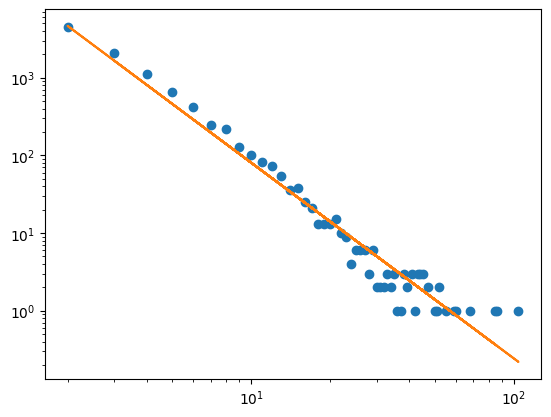

γ = -2.5202370185115894


In [100]:
degree_dist(g_2_10_4)

[ 15  72  14  29  12  76  31  64 103  37  89   1 138  79  38  98 117 126
 168 107  74  56  45 144  70  50  59  73  49  54  44  33  27  60  35  30
  41  18  47  42  28  68  55  65  34  52  57  62  25  19  22  71  51  21
  36  17  10  48  32  23   9  39  16  24   7  43  13  26  40  11  53  20
   8   4   5   6   3]
[  70    1   74   12  102    1    9    2    2    4    1    1    1    1
    6    1    1    1    1    1    2    2    2    1    1    2    2    1
    2    1    2    7   10    1    4   14    1   36    1    3   10    1
    2    1    2    2    3    1   23   39   18    1    1   26    5   47
  187    1    7   22  256    4   60   14  536    1  100   10    1  148
    1   20  411 2010 1172  789 3681]


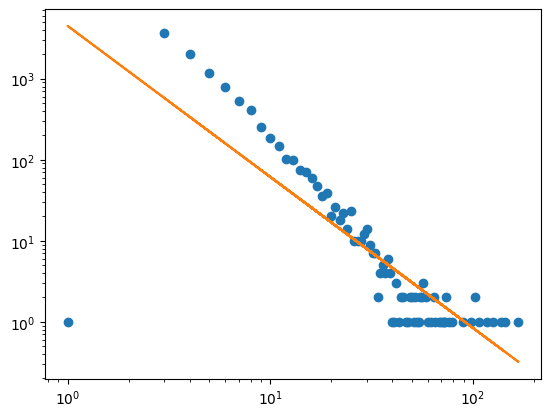

γ = -1.8636911080249925


In [101]:
degree_dist(g_3_10_4)

4. Korzystając z biblioteki networkx i dwóch wybranych metod osadzania wierzchołków (layout) narysuj wygenerowane grafy dla n>=1000. Kolor, bądź promień wierzchołka powinien odzwierciedlać jego stopień.

In [94]:
import math

def shell_layout(graph):
    nodes = list(graph.nodes)
    len_nodes = len(nodes)
    chunk_size = int(math.sqrt(len_nodes))
    chunks = np.array_split(nodes, chunk_size)
    return nx.shell_layout(graph,chunks)

def spring_layout(graph):
    return nx.spring_layout(graph)

def draw_graph(graph, layout):
    colors = list(map(lambda d: d[1], graph.degree))
    sizes = list(map(lambda c: (c+100)*10, colors))
    cmap = 'viridis'
    plt.figure(figsize=(100,100))
    nx.draw_networkx(graph, pos=layout(graph), node_color=colors, cmap=cmap, node_size=sizes)

In [ ]:
draw_graph(g_3_10_3, spring_layout)

In [ ]:
draw_graph(g_3_10_3, shell_layout)

In [ ]:
draw_graph(g_2_10_4, spring_layout)

In [ ]:
draw_graph(g_2_10_4, shell_layout)

In [ ]:
draw_graph(g_3_10_4, spring_layout)

In [ ]:
draw_graph(g_3_10_4, shell_layout)

## Zadanie 2 Odporność grafu scale-free na błędy i ataki

1. Niech *f* oznaczna procent wierzchołków usuniętych z grafu zgodnie z dwoma strategiami:

    A. losowy błąd (usunięcie losowo wybranego wierzchołka - równomierny rozkład prawdopodobieństwa)
    
    B. atak (usunięcie losowego wierzchołka - prawdopodobieństwo proporcjonalne do jego stopnia)

In [128]:
import copy

def remove_nodes(graph, f: int, mode: str = 'err'):
    graph = copy.deepcopy(graph)
    n_nodes = len(list(graph.nodes))
    n_remove = n_nodes * f // 100
    ps = np.array([1]*n_nodes)
    if mode != 'err':
        ps = np.array(list(map(lambda d: d[1] + 1, graph.degree)))
    ps = ps / ps.sum()
    deleted_nodes = random.choice(graph.nodes, n_remove, p=ps, replace=False)
    graph.remove_nodes_from(deleted_nodes)
    return graph

2. Wykorzystując dwa deskryptory grafowe: *efektywność* oraz *średnia długość najkrótszej ścieżki* zbadaj odporność grafu BA z zadania 1 na błędy (A) i ataki (B)wyznaczając zależności *E(f)* oraz *L(f)*. Dokonaj interpretacji uzyskanych wyników.

In [148]:
def test_graph(graph, mode: str = 'err'):
    effs = [nx.global_efficiency(graph)]
    asps = [nx.average_shortest_path_length(graph)] if nx.is_connected(graph) else [-1]
    graph = copy.deepcopy(graph)
    for f in range(1,16):
        new_graph = remove_nodes(graph, f, mode)
        effs.append(nx.global_efficiency(new_graph))
        if nx.is_connected(graph):
            asps.append(nx.average_shortest_path_length(new_graph))
        else:
            asps.append(-1)
    
    return (effs,asps)

In [149]:
def plot_effs_asps(effs,asps):
    fs = range(len(effs))
    eff_m, eff_b = np.polyfit(fs, effs, 1)
    asp_m, asp_b = np.polyfit(fs, asps, 1)
    print(f'L(f) = {asp_m} * f + {asp_b}')
    print(f'E(f) = {eff_m} * f + {eff_b}')

    plt.plot(fs, effs, 'o', color='r')
    plt.plot(fs, asps, 'o', color='b')
    plt.show()

Wykres efektywności i średniej długości najkrótszej ścieżki dla f od 0% do 50% w przypadku A

L(f) = -0.03722587390492913 * f + 0.3144077656402208
E(f) = -0.006373965460813026 * f + 0.23522177913128828


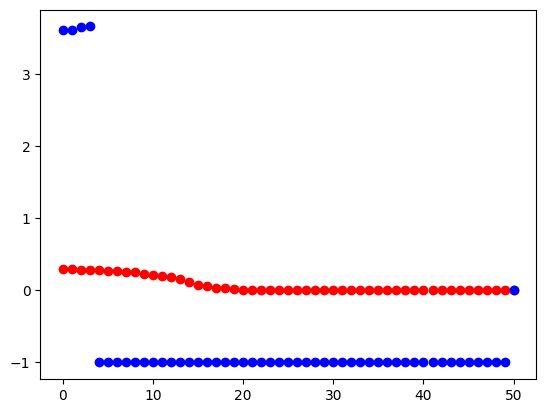

In [ ]:
plot_effs_asps(g_3_10_3_effs_err, g_3_10_3_asps_err)

In [150]:
g_3_10_3_effs_err, g_3_10_3_asps_err = test_graph(g_3_10_3)

Wykres efektywności i średniej długości najkrótszej ścieżki dla f od 0% do 15% w przypadku A

L(f) = -0.43090274266779854 * f + 4.277663314704014
E(f) = -0.014257346861659336 * f + 0.3371717019336512


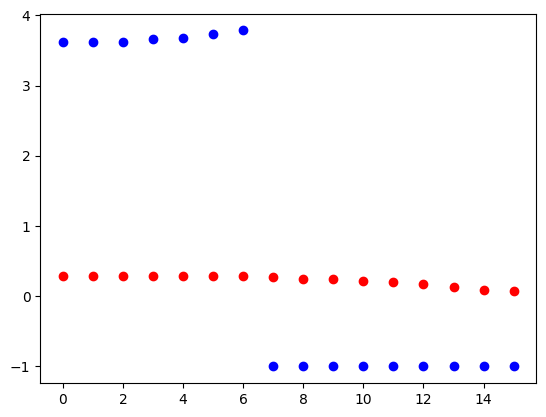

In [151]:
plot_effs_asps(g_3_10_3_effs_err, g_3_10_3_asps_err)

In [145]:
g_3_10_3_effs_atk, g_3_10_3_asps_atk = test_graph(g_3_10_3, mode='atk')

Wykres efektywności i średniej długości najkrótszej ścieżki dla f od 0% do 15% w przypadku B

L(f) = -0.1909122228171624 * f + 1.0115688945259371
E(f) = -0.02385176039896326 * f + 0.3291385493088539


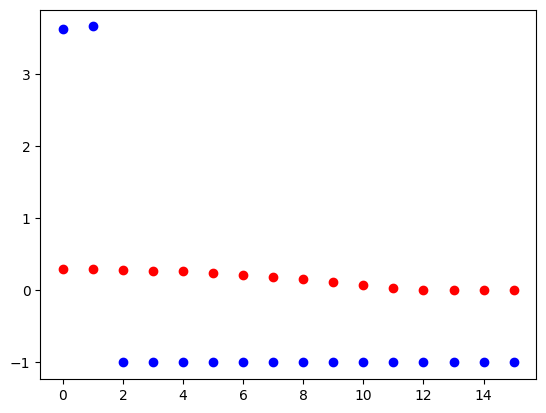

In [146]:
plot_effs_asps(g_3_10_3_effs_atk, g_3_10_3_asps_atk)

In [152]:
g_2_10_4_effs_err, g_2_10_4_asps_err = test_graph(g_2_10_4)

Wykres efektywności i średniej długości najkrótszej ścieżki dla f od 0% do 15% w przypadku A

L(f) = -0.14349555426130842 * f + 0.4827873940335206
E(f) = -0.012691540170371085 * f + 0.21841832592370017


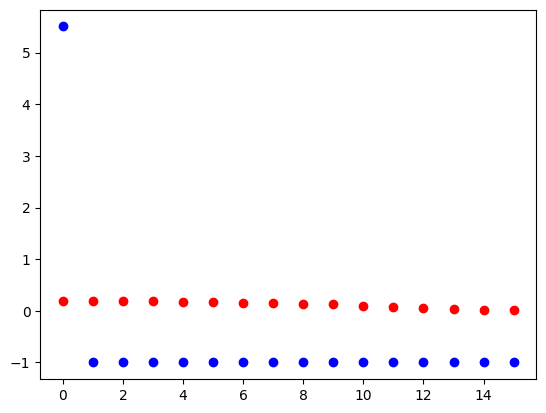

In [153]:
plot_effs_asps(g_2_10_4_effs_err, g_2_10_4_asps_err)

In [154]:
g_2_10_4_effs_atk, g_2_10_4_asps_atk = test_graph(g_2_10_4, mode='atk')

Wykres efektywności i średniej długości najkrótszej ścieżki dla f od 0% do 15% w przypadku B

L(f) = -0.14349555426130842 * f + 0.4827873940335206
E(f) = -0.015304595747507777 * f + 0.18927790032896433


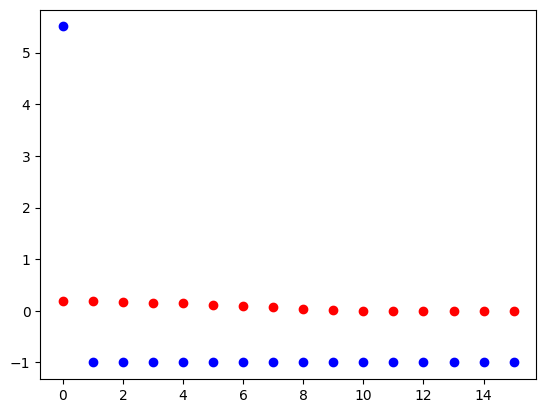

In [155]:
plot_effs_asps(g_2_10_4_effs_atk, g_2_10_4_asps_atk)

Uzyskane wyniki pokazują że grafy BA są słabo odporne na usuwanie wierzchołków, usunięcie kilku procent wierzchołków, szczególnie w przypadu B, prowadzi do rozspójnienia grafu. 